In [2]:
import pandas as pd
wmb_area_dict = {
    'Lower Sikanni Chief River': 309789.456792,
    'Blueberry River':  296019.443572,
    'Upper Beatton River':  339648.8591,
    'Middle Beatton River': 89743.33597
}


wmb_intact_dict = {
    'Lower Sikanni Chief River': 294561.13263,
    'Blueberry River':	 153585.735113,
    'Upper Beatton River':	  289510.627631,
    'Middle Beatton River':	63073.128119
}

wmb_refined50_within = {
    'Lower Sikanni Chief River': 116999.696233,
    'Blueberry River':	 41027.131566,
    'Upper Beatton River':	  87475.886836,
    'Middle Beatton River':	18965.742537
}

wmb_df = pd.DataFrame()


wmb_df['Contiguous Refined 25/50% Threshold Area'] = pd.Series(wmb_refined50_within)
wmb_df['Intact Area'] = pd.Series(wmb_intact_dict)
wmb_df['WMB Area'] = pd.Series(wmb_area_dict)
wmb_df['% of WMB in Contig'] = wmb_df['Contiguous Refined 25/50% Threshold Area'] / wmb_df['WMB Area']
wmb_df['% of Intact WMB in Contig'] = wmb_df['Contiguous Refined 25/50% Threshold Area'] / wmb_df['Intact Area']


wmb_df

,Contiguous Refined 25/50% Threshold Area,Intact Area,WMB Area,% of WMB in Contig,% of Intact WMB in Contig
Lower Sikanni Chief River,116999.696233,294561.132630,309789.456792,0.377675,0.397200
Blueberry River,41027.131566,153585.735113,296019.443572,0.138596,0.267129
Upper Beatton River,87475.886836,289510.627631,339648.859100,0.257548,0.302151
Middle Beatton River,18965.742537,63073.128119,89743.335970,0.211333,0.300694


In [86]:
import pandas as pd

# export refined interior patch polygon attributes as CSV and read as pandas dataframe
# df = pd.read_csv(r"\\spatialfiles.bcgov\work\srm\fsj\Workarea\nross\WMBPlanning\Data\Contiguous\InteriorHabitat_noPrivate_byWMB.csv")
df = pd.read_csv(r"\\spatialfiles.bcgov\work\srm\fsj\Workarea\nross\WMBPlanning\Data\Contiguous\BroadContiguousWMB.csv")


df = df.rename(columns={
    'WATER_MANAGEMENT_BASIN_NAME': 'WMBName', 
    "Hectares": "WMBAreaHa", 
    "AreaHa_": "EntirePatchAreaHa"
    })
df["WMB_PatchAreaHa"] = df['Shape_Area'] / 10000
df.columns

Index(['FID_remaining_BroadCH_DistMerge_explode_50', 'Shape_Leng', 'ORIG_FID',
       'FID_StudyArea_Erase', 'WMB', 'Inner', 'Shape_Length', 'Shape_Area',
       'OBJECTID_2', 'WMB_PatchAreaHa'],
      dtype='object')

In [22]:
wmbsum = df[['WMB_PatchAreaHa', 'WMB']].groupby("WMB").sum()
wmbsum['25% Interior'] = wmbsum['WMB_PatchAreaHa']/4
wmbsum['WMB Total Area'] = wmbsum.index.map(wmb_area_dict)
wmbsum['% of WMB in interior'] = wmbsum['WMB_PatchAreaHa'] / wmbsum['WMB Total Area']
wmbsum

,WMB_PatchAreaHa,25% Interior,WMB Total Area,% of WMB in interior
WMB,,,,
Blueberry River,111587.094625,27896.773656,296019.443572,0.376959
Lower Sikanni Chief River,430773.596702,107693.399175,309789.456792,1.390537
Middle Beatton River,65063.576446,16265.894112,89743.335970,0.724996
Upper Beatton River,241622.994009,60405.748502,339648.859100,0.711391


In [87]:
# Sort the dataset by patch size descending. For each WMB, calculate the cumulative sum of the patch area.
# sorteddf = df.sort_values('EntirePatchAreaHa', ascending=False)
# sorteddf['Cumul'] = sorteddf.groupby("WMBName")['EntirePatchAreaHa'].transform(pd.Series.cumsum) 
# # Get the sum of all patches by WMB
# sorteddf['WMBInteriorTotal'] = sorteddf.groupby("WMBName")['EntirePatchAreaHa'].transform(pd.Series.sum)
# # Get percentage of each cumulative step of the entire df
# # Note that these values are not "split" along WMB borders so some of the area here will actually be outside the WMB
# sorteddf['Interior_Cumulative_Entire_pct'] = sorteddf['Cumul'] / sorteddf['WMBInteriorTotal']

# Repeat with the patches completely within WMBs.
wmb_sorted_df = df.sort_values('WMB_PatchAreaHa', ascending=False).loc[(df['Inner'] == 'Inner')]
# wmb_sorted_df
wmb_sorted_df['Cumul'] = wmb_sorted_df.groupby(["WMB", "Inner"])['WMB_PatchAreaHa'].transform(pd.Series.cumsum) 
wmb_sorted_df['WMBInteriorTotal'] = wmb_sorted_df.groupby(["WMB", "Inner"])['WMB_PatchAreaHa'].transform(pd.Series.sum)
wmb_sorted_df['Interior_Cumulative_WMB_pct'] = wmb_sorted_df['Cumul'] / wmb_sorted_df['WMBInteriorTotal']

In [37]:
wmb_sorted_df.sort_values('Interior_Cumulative_WMB_pct', ascending=False)

,FID_remaining_BroadCH_DistMerge_explode_50,Shape_Leng,ORIG_FID,FID_StudyArea_Erase,WMB,Inner,Shape_Length,Shape_Area,OBJECTID_2,WMB_PatchAreaHa,Cumul,WMBInteriorTotal,Interior_Cumulative_WMB_pct
14529,14097,728594.830022,1,5,Lower Sikanni Chief River,Inner,13.483154,1.191470e-01,14530,1.191470e-05,266322.090715,266322.090715,1.000000
13426,13068,728594.830022,1,7,Upper Beatton River,Inner,0.043330,5.561999e-05,13427,5.561999e-09,240389.229726,240389.229726,1.000000
11265,10975,728594.830022,1,8,Middle Beatton River,Inner,0.905228,3.460629e-02,11266,3.460629e-06,52442.550375,52442.550375,1.000000
4186,4132,728594.830022,1,6,Blueberry River,Inner,0.043411,8.911999e-05,4187,8.911999e-09,120170.779157,120170.779157,1.000000
9432,9232,728594.830022,1,7,Upper Beatton River,Inner,0.154171,8.914700e-04,9433,8.914700e-08,240389.229726,240389.229726,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16140,15633,728594.830022,1,5,Lower Sikanni Chief River,Inner,424124.777511,2.966786e+08,16141,2.966786e+04,29667.859450,266322.090715,0.111398
12376,12053,728594.830022,1,8,Middle Beatton River,Inner,78652.140939,2.302196e+07,12377,2.302196e+03,5701.677296,52442.550375,0.108722
11609,11311,728594.830022,1,7,Upper Beatton River,Inner,486049.207869,1.781464e+08,11610,1.781464e+04,17814.644689,240389.229726,0.074107
7390,7271,728594.830022,1,6,Blueberry River,Inner,219987.725794,8.844463e+07,7391,8.844463e+03,8844.462884,120170.779157,0.073599


In [89]:
# Create summary tables showing the last (meaning maximum in each group) polygon area and OBJECTID before reaching the 25% and 50% values for the entire area.
p25 = wmb_sorted_df.loc[wmb_sorted_df['Interior_Cumulative_WMB_pct'] <= 0.25][["WMB", 'WMB_PatchAreaHa', 'OBJECTID_2', 'Interior_Cumulative_WMB_pct']].groupby(["WMB"]).last()
p50 = wmb_sorted_df.loc[wmb_sorted_df['Interior_Cumulative_WMB_pct'] <= 0.5][["WMB", 'WMB_PatchAreaHa', 'OBJECTID_2', 'Interior_Cumulative_WMB_pct', 'Cumul']].groupby(["WMB"]).last()

# Join these two together into one threshold dataframe and display
thresh_df = p25.join(p50, lsuffix="_25", rsuffix="_50").reset_index()
thresh_df['WMB Total Area'] = thresh_df['WMB'].map(wmb_area_dict)
thresh_df['WMB Intact Area'] = thresh_df['WMB'].map(wmb_intact_dict)
thresh_df['Top 50 / Entire WMB'] = thresh_df['Cumul'] / thresh_df['WMB Total Area'] * 100
thresh_df['Top 50 / Intact WMB'] = thresh_df['Cumul'] / thresh_df['WMB Intact Area'] * 100
thresh_df

,WMB,WMB_PatchAreaHa_25,OBJECTID_2_25,Interior_Cumulative_WMB_pct_25,WMB_PatchAreaHa_50,OBJECTID_2_50,Interior_Cumulative_WMB_pct_50,Cumul,WMB Total Area,WMB Intact Area,Top 50 / Entire WMB,Top 50 / Intact WMB
0,Blueberry River,1822.969502,4914,0.237508,673.334919,5403,0.495801,59580.734684,296019.443572,153585.735113,20.127304,38.793144
1,Lower Sikanni Chief River,23600.295052,15864,0.200014,4506.053322,15642,0.484888,129136.321687,309789.456792,294561.132630,41.685189,43.840245
2,Middle Beatton River,1314.269842,11289,0.237620,604.079334,13595,0.498048,26118.932149,89743.335970,63073.128119,29.104035,41.410555
3,Upper Beatton River,3522.126876,12872,0.239914,1499.149825,14540,0.496714,119404.595562,339648.859100,289510.627631,35.155306,41.243597


In [57]:
# Assign threshold values to original
df = pd.merge(df, thresh_df[['WMB', 'WMB_PatchAreaHa_25', 'WMB_PatchAreaHa_50']], on="WMB")
# df = pd.merge(df, thresh_df[['WMB', 'WMB_PatchAreaHa_25B']], on="WMB")

df['threshold'] = ""
df.loc[df['WMB_PatchAreaHa'] >= df['WMB_PatchAreaHa_50'], "threshold"] = "50"
df.loc[df['WMB_PatchAreaHa'] >= df['WMB_PatchAreaHa_25'], "threshold"] = "25"


In [60]:
df.loc[df['threshold'] == '50'].sort_values("WMB_PatchAreaHa", ascending=False)

,FID_remaining_BroadCH_DistMerge_explode_50,Shape_Leng,ORIG_FID,FID_StudyArea_Erase,WMB,Inner,Shape_Length,Shape_Area,OBJECTID_2,WMB_PatchAreaHa,WMB_PatchAreaHa_25,WMB_PatchAreaHa_50,threshold
15970,15465,728594.830022,1,1,Lower Sikanni Chief River,Outer,190053.381492,2.318684e+08,15971,23186.836201,23600.295052,4506.053322,50
15279,14802,728594.830022,1,1,Lower Sikanni Chief River,Outer,311025.802503,2.007499e+08,15279,20074.987688,23600.295052,4506.053322,50
16142,15635,728594.830022,1,1,Lower Sikanni Chief River,Outer,197569.220087,1.944057e+08,16143,19440.565174,23600.295052,4506.053322,50
15476,14990,728594.830022,1,1,Lower Sikanni Chief River,Outer,204855.652893,1.551938e+08,15477,15519.381616,23600.295052,4506.053322,50
15067,14597,728594.830022,1,5,Lower Sikanni Chief River,Inner,317350.750854,1.425415e+08,15066,14254.150744,23600.295052,4506.053322,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13163,9873,728594.830022,1,8,Middle Beatton River,Inner,18853.736928,6.697657e+06,10112,669.765725,1314.269842,604.079334,50
14153,12331,728594.830022,1,2,Middle Beatton River,Outer,15468.970548,6.481202e+06,12662,648.120157,1314.269842,604.079334,50
13409,10360,728594.830022,1,2,Middle Beatton River,Outer,20592.151410,6.349890e+06,10618,634.988956,1314.269842,604.079334,50
13957,11507,728594.830022,1,2,Middle Beatton River,Outer,18161.305526,6.128491e+06,11809,612.849081,1314.269842,604.079334,50


In [61]:
# df[['OBJECTID_2', "WMB", "Inner", "WMB_PatchAreaHa", "WMB_PatchAreaHa_25", "WMB_PatchAreaHa_50", "threshold"]].to_csv(r"\\spatialfiles.bcgov\work\srm\fsj\Workarea\nross\WMBPlanning\Data\InteriorHabitat_noPrivate_byWMB_threshold.csv")
df[['OBJECTID_2', "WMB", "Inner", "WMB_PatchAreaHa", "WMB_PatchAreaHa_25", "WMB_PatchAreaHa_50", "threshold"]].to_csv(r"\\spatialfiles.bcgov\work\srm\fsj\Workarea\nross\WMBPlanning\Data\Contiguous\Broad_InteriorHabitat_noPrivate_byWMB_threshold.csv")

array([[<Axes: title={'center': 'WMB_PatchAreaHa'}>]], dtype=object)

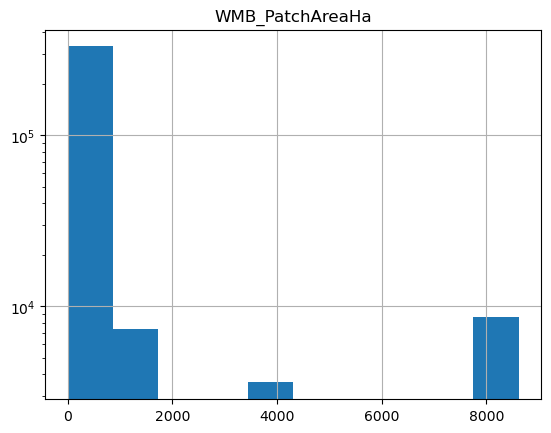

In [65]:
wmb_sorted_df.hist(column='WMB_PatchAreaHa', weights=wmb_sorted_df['WMB_PatchAreaHa'],)

In [14]:
# Create a table with the objectids and the two percentage fields for joining with the dataset in ArcPro

join_df = sorteddf[['OBJECTID_2', 'Interior_Cumulative_Entire_pct']].join(wmb_sorted_df['Interior_Cumulative_WMB_pct'])
join_df
# join_df.to_csv(r'\\spatialfiles.bcgov\work\srm\fsj\Workarea\nross\WMBPlanning\Data\RefinedContiguousCumulativePct.csv')

,OBJECTID_2,Interior_Cumulative_Entire_pct,Interior_Cumulative_WMB_pct
21885,43513,0.145997,0.049815
16025,37653,0.038447,0.671285
21469,43097,0.163064,0.070510
21898,43526,0.174896,0.148984
3574,25202,0.031099,0.356186
...,...,...,...
2,21630,1.000000,1.000000
9333,30961,1.000000,1.000000
17997,39625,1.000000,1.000000
18046,39674,1.000000,1.000000


In [3]:
import geopandas as gpd

x = r'\\spatialfiles.bcgov\work\srm\fsj\Workarea\nross\WMBPlanning\Deliverables\HexagonOutputs\ContiguousHabitatHex.gdb'
gdf = gpd.read_file(x, layer = 'PU1ha_ContigHb5025_2024_12_18', rows=1)
gdf

ValueError: Null layer: 'PU1ha_ContigHb5025_2024_12_18'

In [ ]:
from arcgis import GeoAccessor